#### I imported necessary libraries**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visulization
import seaborn as sns # data visulization
from copy import deepcopy # data copy
from sklearn.model_selection import train_test_split # data split
from sklearn.preprocessing import StandardScaler # data preprocessing
from sklearn.ensemble import RandomForestClassifier # machine learning algorithm
from sklearn.svm import SVC # machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier # machine learning algorithm
from sklearn.linear_model import LogisticRegression # machine learning algorithm
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score # measure error algorithm
from keras.models import Sequential # start ANN model Deep Learning tool
from keras.layers import Dense,Dropout # Deep Learning tool for prepare ANN model 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.


/kaggle/input/heart-disease-uci/heart.csv


#### I loaded the dataset

In [2]:
dataset=pd.read_csv("../input/heart-disease-uci/heart.csv")

### I got some information about the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### I observed the data

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### I observed people that have heart dieases according to age

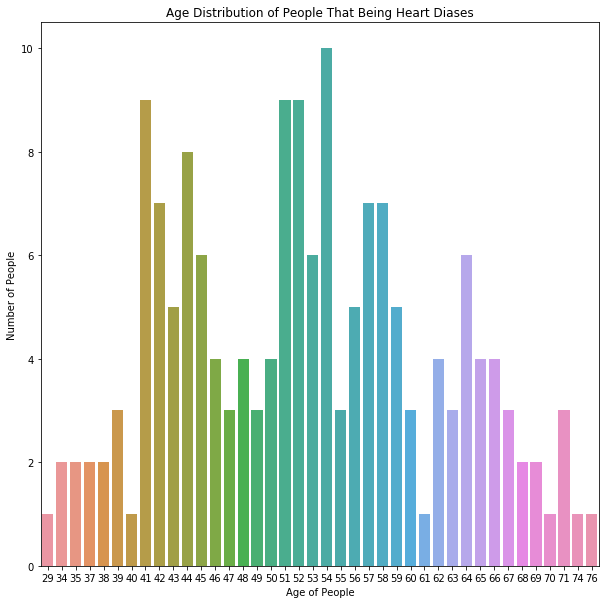

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(dataset.age[dataset.target == 1 ])
plt.title("Age Distribution of People That Being Heart Diases")
plt.ylabel("Number of People")
plt.xlabel("Age of People")
plt.show()

#### I observed people that have not heart dieases according to age

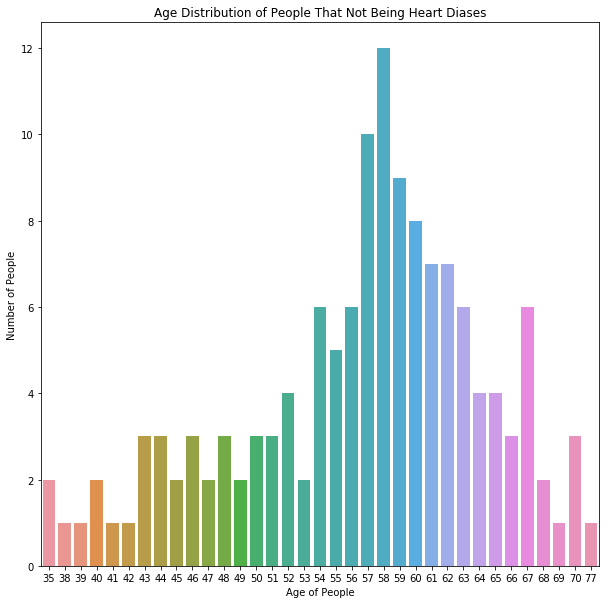

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(dataset.age[dataset.target == 0 ])
plt.title("Age Distribution of People That Not Being Heart Diases")
plt.ylabel("Number of People")
plt.xlabel("Age of People")
plt.show()

#### I divided it into labels and theirs features

In [7]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1:].values
print("x shape :",x.shape)
print("y shape :",y.shape)

x shape : (303, 13)
y shape : (303, 1)


#### I divided the dataset as train and test dataset

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print("x_train shape :",x_train.shape)
print("x_test shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (227, 13)
x_test shape : (76, 13)
y_train shape : (227, 1)
y_test shape : (76, 1)


### I compressed the values -1 between 1

In [9]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# ARTIFICIAL NEURAL NETWORK

#### I creat my ANN model

In [10]:
model = Sequential()

model.add(Dense(206,activation="relu",input_dim=13))
model.add(Dropout(0.4))
model.add(Dense(103,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

#### I compiled my model because I want to see validation and loss of train and test dataset

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### I started to work my model

In [12]:
hist=model.fit(x_train,y_train,batch_size=250,epochs=100,validation_data=(x_test,y_test))

Train on 227 samples, validate on 76 samples
Epoch 1/100
227/227 [==============================] - 1s 2ms/step - loss: 0.7860 - accuracy: 0.3965 - val_loss: 0.6991 - val_accuracy: 0.4737
Epoch 2/100
227/227 [==============================] - 0s 33us/step - loss: 0.7380 - accuracy: 0.4802 - val_loss: 0.6631 - val_accuracy: 0.5789
Epoch 3/100
227/227 [==============================] - 0s 30us/step - loss: 0.6761 - accuracy: 0.5727 - val_loss: 0.6311 - val_accuracy: 0.6842
Epoch 4/100
227/227 [==============================] - 0s 30us/step - loss: 0.6743 - accuracy: 0.5771 - val_loss: 0.6023 - val_accuracy: 0.7500
Epoch 5/100
227/227 [==============================] - 0s 27us/step - loss: 0.6195 - accuracy: 0.6784 - val_loss: 0.5768 - val_accuracy: 0.8289
Epoch 6/100
227/227 [==============================] - 0s 28us/step - loss: 0.5882 - accuracy: 0.7489 - val_loss: 0.5538 - val_accuracy: 0.8158
Epoch 7/100
227/227 [==============================] - 0s 27us/step - loss: 0.5892 - accurac

#### I equalized the values I obtained 0 and 1 for using heatmap visulization and I used deepcopy predicted values for use roc_curve and roc_auc_score algorithms 

In [13]:
prediction=model.predict(x_test)
predict=deepcopy(prediction)
for i in range(0,len(prediction)):
    if prediction[i] <0.5:
        prediction[i] = 0
    else:
        prediction[i] = 1

#                         HEAT MAP

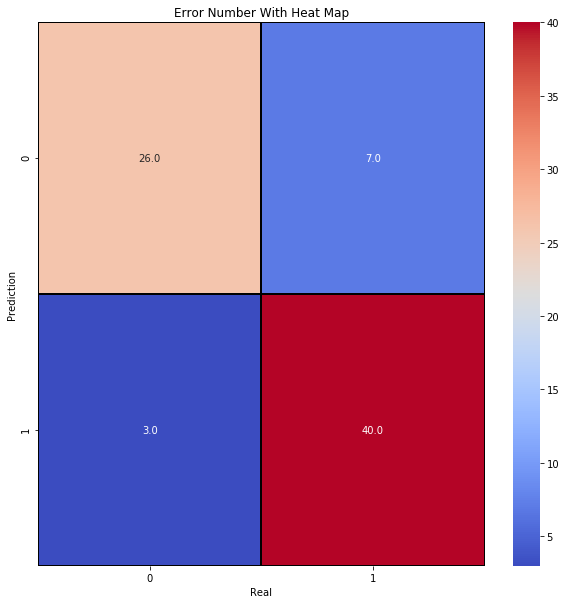

In [14]:
cfm=confusion_matrix(y_test,prediction)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cfm,annot=True,cmap="coolwarm",linewidths=1,linecolor="black",fmt=".1f",ax=ax)
plt.title("Error Number With Heat Map")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()

# ROC CURVE

In [15]:
fpr,tpr,threshold=roc_curve(y_test,predict)
print("fpr shape :",fpr.shape)
print("tpr shape :",tpr.shape)
print("threshold shape :",threshold.shape)

fpr shape : (20,)
tpr shape : (20,)
threshold shape : (20,)


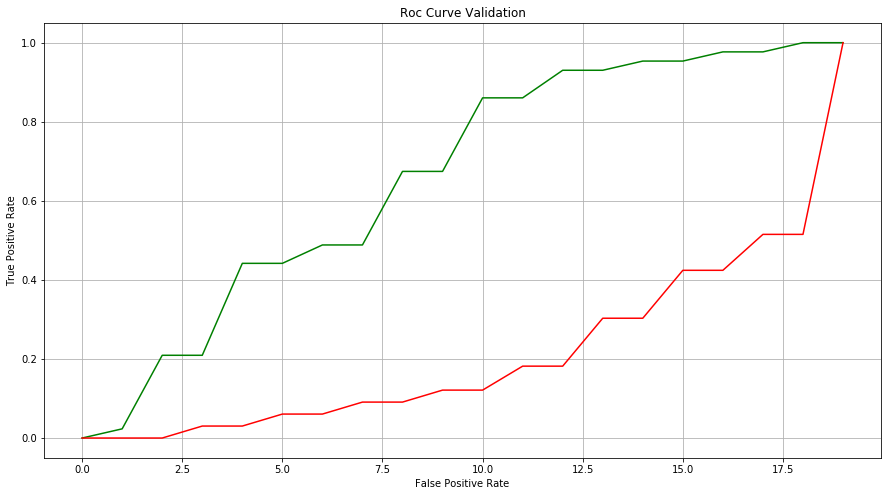

In [16]:
plt.figure(figsize=(15,8))
plt.plot(tpr,color="green",label="TPR")
plt.plot(fpr,color="red",label="FPR")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.title("Roc Curve Validation")
plt.show()

# ROC AUC SCORE

In [17]:
score=roc_auc_score(y_test,predict)
print("Roc Auc Score :",score)

Roc Auc Score : 0.9090909090909091


# RANDOM FOREST CLASSIFIER

#### I changed the number several numbers of estimators by for loop for which number to decide better

In [18]:
train_score=[]
test_score=[]
for i in range(1,11):
 rfc=RandomForestClassifier(n_estimators=i,random_state=0)
 rfc.fit(x_train,y_train)
 train_score.append(rfc.score(x_train,y_train))
 test_score.append(rfc.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

#### I observed and decided which number better

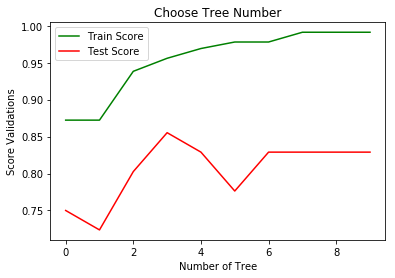

In [19]:
plt.plot(train_score,color="green",label="Train Score")
plt.plot(test_score,color="red",label="Test Score")
plt.legend()
plt.xlabel("Number of Tree")
plt.ylabel("Score Validations")
plt.title("Choose Tree Number")
plt.show()

In [20]:
rfc1=RandomForestClassifier(n_estimators=3,random_state=0)
rfc1.fit(x_train,y_train)
prediction=rfc1.predict(x_test)
print("Train Accuracy :",rfc1.score(x_train,y_train))
print("Test Accuracy :",rfc1.score(x_test,y_test))

Train Accuracy : 0.9383259911894273
Test Accuracy : 0.8026315789473685


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


# HEAT MAP

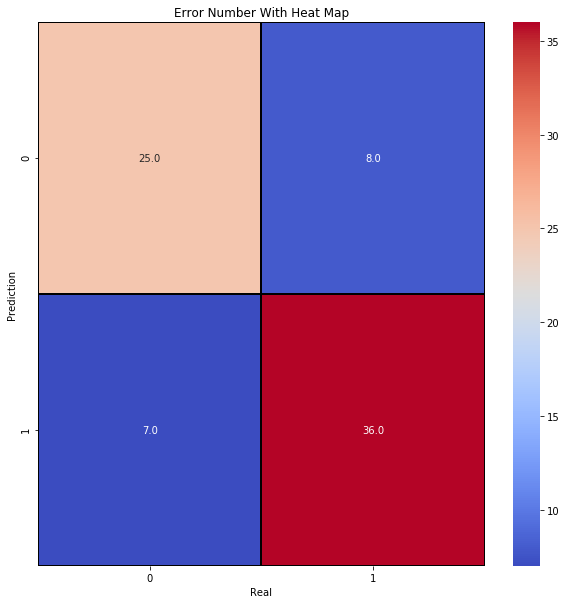

In [21]:
f,ax=plt.subplots(figsize=(10,10))
cfm=confusion_matrix(y_test,prediction)
sns.heatmap(cfm,annot=True,cmap="coolwarm",linewidths=1,linecolor="black",fmt=".1f",ax=ax)
plt.title("Error Number With Heat Map")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [22]:
svc=SVC(random_state=42)
svc.fit(x_train,y_train)
print("Train Accuracy :",svc.score(x_train,y_train))
print("Test Accuracy :",svc.score(x_test,y_test))

Train Accuracy : 0.9162995594713657
Test Accuracy : 0.8552631578947368


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
prediction=svc.predict(x_test)

# HEAT MAP

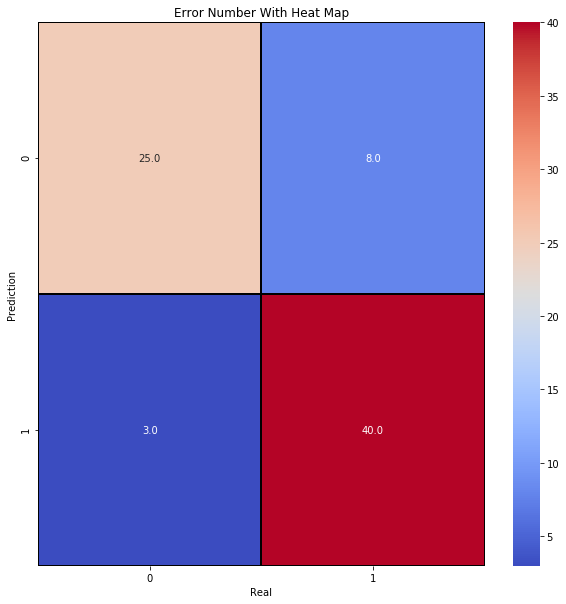

In [24]:
f,ax=plt.subplots(figsize=(10,10))
cfm=confusion_matrix(y_test,prediction)
sns.heatmap(cfm,annot=True,cmap="coolwarm",linewidths=1,linecolor="black",fmt=".1f",ax=ax)
plt.title("Error Number With Heat Map")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()

# K-NEAREST NEİGHBOURS

In [25]:
train_score=[]
test_score=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

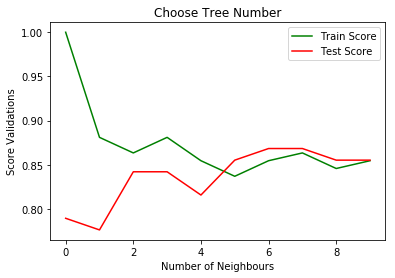

In [26]:
plt.plot(train_score,color="green",label="Train Score")
plt.plot(test_score,color="red",label="Test Score")
plt.legend()
plt.xlabel("Number of Neighbours")
plt.ylabel("Score Validations")
plt.title("Choose Tree Number")
plt.show()

In [27]:
knn1=KNeighborsClassifier(n_neighbors=6)
knn1.fit(x_train,y_train)
print("Train Accuracy :",knn1.score(x_train,y_train))
print("Test Accuracy :",knn1.score(x_test,y_test))

Train Accuracy : 0.8370044052863436
Test Accuracy : 0.8552631578947368


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [28]:
prediction=knn1.predict(x_test)

# HEAT MAP

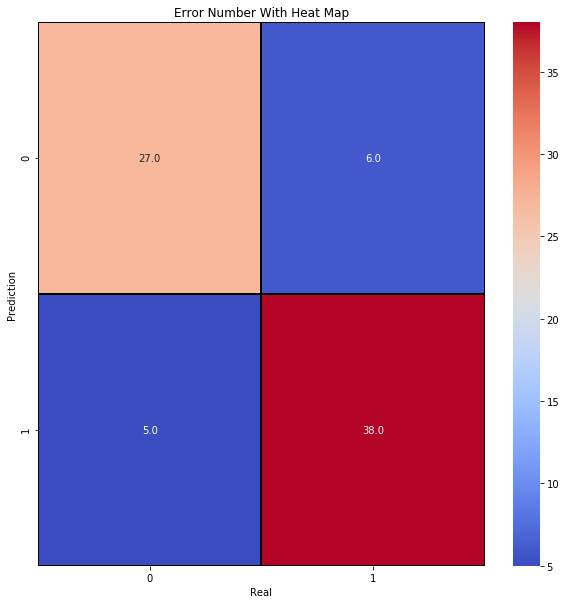

In [29]:
f,ax=plt.subplots(figsize=(10,10))
cfm=confusion_matrix(y_test,prediction)
sns.heatmap(cfm,annot=True,cmap="coolwarm",linewidths=1,linecolor="black",fmt=".1f",ax=ax)
plt.title("Error Number With Heat Map")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()

# LOGISTIC REGRESSION

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print("Train Accuracy :",lr.score(x_train,y_train))
print("Test Accuracy :",lr.score(x_test,y_test))

Train Accuracy : 0.8590308370044053
Test Accuracy : 0.8289473684210527


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
prediction=lr.predict(x_test)

# HEAT MAP 

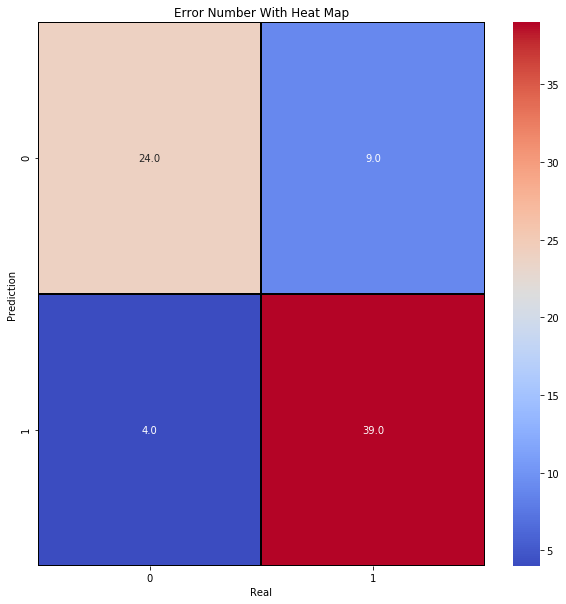

In [32]:
f,ax=plt.subplots(figsize=(10,10))
cfm=confusion_matrix(y_test,prediction)
sns.heatmap(cfm,annot=True,cmap="coolwarm",linewidths=1,linecolor="black",fmt=".1f",ax=ax)
plt.title("Error Number With Heat Map")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()